In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import glob
import os

def load_weather_data(folder_path) -> pd.DataFrame:
    print("Loading weather data...")

    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

    if not csv_files:
        print(f"No CSV files found in {folder_path}. Returning an empty DataFrame.")
        return pd.DataFrame()

    df_list = []
    for file in csv_files:
        print(f"Loading file {file}")
        df_list.append(pd.read_csv(file, index_col="datetime"))

    weather = pd.concat(df_list, axis=0)
    weather.index = pd.to_datetime(weather.index)
    return weather

weather = load_weather_data("weather_data/")

# Convert index into a pandas datetime
weather.index = pd.to_datetime(weather.index)
weather.head()

Loading weather data...
Loading file weather_data/kericho, kenya 2024_01_01 to 2024_12_31.csv
Loading file weather_data/kericho, kenya 2022_01_01 to 2022_12_31.csv


Loading file weather_data/nakuru, kenya 2020_01_01 to 2021_12_31.csv
Loading file weather_data/kericho, kenya 2021_01_01 to 2021_12_31.csv
Loading file weather_data/kericho, kenya 2020_01_01 to 2020_12_31.csv
Loading file weather_data/kericho, kenya 2023_01_01 to 2023_12_31.csv


,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01,"Kericho, Kenya",25.0,14.7,19.9,25.0,14.7,19.9,17.2,84.6,11.2,...,14.3,7,30.0,2024-01-01T06:37:56,2024-01-01T18:46:26,0.67,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"HKKI,63708099999,63709099999,63710099999,remote"
2024-01-02,"Kericho, Kenya",27.0,15.3,20.8,28.8,15.3,20.9,17.3,81.4,9.9,...,19.9,8,30.0,2024-01-02T06:38:25,2024-01-02T18:46:54,0.71,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"HKKI,63708099999,63709099999,63710099999,remote"
2024-01-03,"Kericho, Kenya",27.1,13.8,21.2,28.6,13.8,21.2,17.9,82.3,6.8,...,20.1,9,30.0,2024-01-03T06:38:53,2024-01-03T18:47:22,0.74,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"HKKI,63708099999,63709099999,63710099999,remote"
2024-01-04,"Kericho, Kenya",25.4,12.3,19.8,25.4,12.3,19.8,16.0,80.7,1.5,...,23.1,9,10.0,2024-01-04T06:39:21,2024-01-04T18:47:49,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"HKKI,63708099999,63709099999,63710099999,remote"
2024-01-05,"Kericho, Kenya",26.0,13.2,19.5,26.0,13.2,19.5,16.5,84.2,3.4,...,20.7,9,10.0,2024-01-05T06:39:48,2024-01-05T18:48:16,0.80,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"HKKI,63708099999,63709099999,63710099999,remote"


In [42]:
print(weather["name"].unique())
print()
weather.info()

['Kericho, Kenya' 'Nakuru, Kenya']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2558 entries, 2024-01-01 to 2023-12-31
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2558 non-null   object 
 1   tempmax           2558 non-null   float64
 2   tempmin           2558 non-null   float64
 3   temp              2558 non-null   float64
 4   feelslikemax      2558 non-null   float64
 5   feelslikemin      2558 non-null   float64
 6   feelslike         2558 non-null   float64
 7   dew               2558 non-null   float64
 8   humidity          2558 non-null   float64
 9   precip            2558 non-null   float64
 10  precipprob        2558 non-null   int64  
 11  precipcover       2558 non-null   float64
 12  preciptype        2096 non-null   object 
 13  snow              2558 non-null   int64  
 14  snowdepth         2558 non-null   int64  
 15  windgust          2558 non-null   f

## Data Cleaning and Formatting
In this section we are going to make the columns atomic; that is remove any comma separated, extra spaced data within our dataframe.

In [43]:
def clean_string_column(df, column_name):
    """
    Reformats a string column in a Pandas DataFrame:
    - Removes all whitespace.
    - Removes all commas.
    - Converts to lowercase.
    - Replaces remaining spaces (if any after initial cleanup) with underscores.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to clean.

    Returns:
        pd.DataFrame: The DataFrame with the cleaned column.
    """
    # Ensure the column is of string type to apply string methods
    df[column_name] = df[column_name].astype(str)

    df[column_name] = df[column_name].str.replace(r'\s+', '_', regex=True)
    df[column_name] = df[column_name].str.replace(',', '')
    df[column_name] = df[column_name].str.lower()
    df[column_name] = df[column_name].str.replace(' ', '_')

    return df

# Clean conditions column
# Clean the name column
weather = clean_string_column(weather.copy(), "conditions")
weather = clean_string_column(weather.copy(), "name")

print(weather["conditions"].unique())
print(weather["name"].unique())

['rain_partially_cloudy' 'rain_overcast' 'partially_cloudy' 'clear' 'rain'
 'overcast']
['kericho_kenya' 'nakuru_kenya']


## Group the data into seasons
Grouping data into seasons will allow us to get the seasonal averages required to check if a crop is suitable to grow in certain location.


In [60]:
def get_season(month):
    if month in [1, 2, 3]:
        return "JFM"    # January, February, March season
    elif month in [4, 5, 6]:
        return "AMJ"    # April, May, June season
    elif month in [7, 8, 9]:
        return "JAS"    # July, August, September season
    else:
        return "OND"    # October, November, December season

weather = weather.copy()
weather["year"] = weather.index.year
weather["month"] = weather.index.month
weather["season"] = weather["month"].apply(get_season)
weather["season"]


datetime
2024-01-01    JFM
2024-01-02    JFM
2024-01-03    JFM
2024-01-04    JFM
2024-01-05    JFM
             ... 
2023-12-27    OND
2023-12-28    OND
2023-12-29    OND
2023-12-30    OND
2023-12-31    OND
Name: season, Length: 2558, dtype: object

In [45]:
# Grouping data into seasons will allow us to get
# seasonal averages eg;
seasonal_data = weather.groupby(["year", "season"])
seasonal_avg = seasonal_data.mean(numeric_only=True)
seasonal_avg

tempmax    tempmin       temp  feelslikemax  feelslikemin  \
year season                                                                
2020 AMJ     26.329121  13.618132  19.870879     26.745604     13.618132   
     JAS     25.728804  12.726630  19.005435     25.893478     12.726630   
     JFM     27.556044  13.421429  20.626374     27.913736     13.416484   
     OND     26.595109  13.493478  20.022826     26.925543     13.493478   
2021 AMJ     26.789560  14.856593  20.409890     27.081319     14.856593   
     JAS     26.069565  14.612500  19.848913     26.115761     14.612500   
     JFM     27.916111  14.389444  20.856667     27.653333     14.377222   
     OND     27.703261  14.214674  20.759239     27.736957     14.214674   
2022 AMJ     28.030769  16.250549  22.171429     28.498901     16.250549   
     JAS     27.458696  16.291304  21.848913     27.535870     16.291304   
     JFM     29.608889  16.204444  22.990000     29.945556     16.204444   
     OND     28.448913  16.503261  22.389130     28.738043     16.503261   
2023 AMJ     28.431868  12.857143  20.678022     29.051648     12.857143   
     JAS     28.926087  12.840217  20.758696     28.947826     12.840217   
     JFM     30.192222  16.831111  23.636667     30.038889     16.831111   
     OND     28.144565  13.030435  20.834783     28.926087     13.030435   
2024 AMJ     28.319780  14.083516  21.273626     29.368132     14.083516   
     JAS     29.070652  13.140217  20.960870     29.023913     13.140217   
     JFM     28.972527  13.940659  21.791209     29.948352     13.940659   
     OND     29.209783  12.927174  21.158696     29.846739     12.927174   

             feelslike        dew   humidity     precip  precipprob  ...  \
year season                                                          ...   
2020 AMJ     19.934066  15.144505  76.447802   8.265934   86.263736  ...   
     JAS     19.028804  14.062500  75.062500   4.465217   86.413043  ...   
     JFM     20.693956  14.695055  71.714286   4.730769   80.769231  ...   
     OND     20.076087  14.245109  72.010326   4.314130   72.282609  ...   
2021 AMJ     20.468132  14.587363  71.915934   4.871978   78.021978  ...   
     JAS     19.869022  13.732065  70.046739   4.461957   83.695652  ...   
     JFM     20.832222  12.350556  62.283333   2.140000   51.666667  ...   
     OND     20.771739  13.404891  65.711957   2.663587   78.804348  ...   
2022 AMJ     22.246154  16.752747  73.462637   6.579121   86.813187  ...   
     JAS     21.857609  15.452174  69.027174   3.707609   90.217391  ...   
     JFM     23.052222  15.928889  67.526667   3.168889   68.888889  ...   
     OND     22.422826  16.054348  69.705435   4.883696   86.956522  ...   
2023 AMJ     20.757143  16.123077  77.093407   7.653846   92.307692  ...   
     JAS     20.770652  14.615217  70.380435   3.895652   89.130435  ...   
     JFM     23.551111  14.857778  61.908889   4.746667   48.888889  ...   
     OND     20.921739  16.061957  76.271739   9.731522   90.217391  ...   
2024 AMJ     21.420879  16.808791  77.429670  10.136264   96.703297  ...   
     JAS     20.957609  14.882609  70.869565   3.558696   92.391304  ...   
     JFM     21.932967  16.305495  73.540659   4.537363   81.318681  ...   
     OND     21.235870  15.602174  72.980435   6.805435   93.478261  ...   

                winddir  sealevelpressure  cloudcover  visibility  \
year season                                                         
2020 AMJ     193.210440       1016.967582   63.553846   22.155249   
     JAS     177.209783       1016.288587   64.353261   22.263587   
     JFM     242.989011       1015.947802   62.648901   22.378571   
     OND     226.109783       1015.379348   61.746739   21.599457   
2021 AMJ     216.178571       1016.113187   61.883516   20.070330   
     JAS     172.289130       1017.050543   67.831522   20.278804   
     JFM     247.634444       1013.963333   61.131667   20.779375   
     OND     184.864130       1014.742391   64.2

### Weather in Kericho
We are now going to check how the weather is in `kericho_kenya`
Then we are going to check if `coffee` crop is suitable to grow there.

In [46]:
kericho_weather = weather[weather["name"] == "kericho_kenya"]
if kericho_weather.empty:
    print("No weather data found for Kericho")
    exit(1)

# Now lets take a look at the total seasonal rain per season
total_seasonal_rain = kericho_weather.groupby(["year", "season"])["precip"].sum()
print(total_seasonal_rain)

# What about the average rain per season?
avg_seasonal_rain = kericho_weather.groupby(["season"])["precip"].mean()
avg_seasonal_rain

year  season
2020  AMJ       934.6
      JAS       383.7
      JFM       642.6
      OND       605.1
2021  AMJ       607.8
      JAS       355.8
      JFM       265.9
      OND       335.6
2022  AMJ       598.7
      JAS       341.1
      JFM       285.2
      OND       449.3
2023  AMJ       696.5
      JAS       358.4
      JFM       427.2
      OND       895.3
2024  AMJ       922.4
      JAS       327.4
      JFM       412.9
      OND       626.1
Name: precip, dtype: float64


season
AMJ    8.263736
JAS    3.840000
JFM    4.499558
OND    6.329130
Name: precip, dtype: float64

In [59]:
# Threshold for coffee crop
coffee_thresholds = {
    "min_temp": 15,
    "max_temp": 24,
    "min_precip": 300,
    "max_precip": 600,
    "min_humidity": 60,
    "max_humidity": 80,
    "min_solarradiation": 12,
    "max_solarradiation": 22
}

def get_suitable_seasons(weather, crop_thresholds):
    seasonal_data = weather.groupby(["year", "season"]).agg({
        "temp": "mean",
        "humidity": "mean",
        "precip": "sum",
        "solarradiation": "mean"
    }).reset_index()
    
    # Evaluate each season
    suitable_seasons = []

    for _, row in seasonal_data.iterrows():
        score = 0
        total = 4  # number of parameters being checked
        
        season_temp = row["temp"]
        season_precip = row["precip"]
        season_humidity = row["humidity"]
        season_solarradiation = row["solarradiation"]

        if crop_thresholds["min_temp"] <= season_temp <= crop_thresholds["max_temp"]:
            score += 1
        if crop_thresholds["min_precip"] <= season_precip <= crop_thresholds["max_precip"]:
            score += 1
        if crop_thresholds["min_humidity"] <= season_humidity <= crop_thresholds["max_humidity"]:
            score += 1
        if crop_thresholds["min_solarradiation"] <= season_solarradiation <= crop_thresholds["max_solarradiation"]:
            score += 1

        if score / total >= 0.75:
            suitable_seasons.append({
                "year": int(row["year"]),
                "season": row["season"],
                "score": score / total,
                "avg_temp": round(row["temp"], 1),
                "total_rain": round(row["precip"], 1),
                "avg_humidity": round(row["humidity"], 1),
                "avg_solarradiation": round(row["solarradiation"], 1)
            })
            
    return suitable_seasons

suitable_seasons = get_suitable_seasons(kericho_weather, coffee_thresholds)
print("Suitable seasons for growing coffe in Kericho")
suitable_seasons


Suitable seasons for growing coffe in Kericho


[{'year': 2020,
  'season': 'JAS',
  'score': 0.75,
  'avg_temp': 20.7,
  'total_rain': 383.7,
  'avg_humidity': 74.5,
  'avg_solarradiation': 62.2},
 {'year': 2021,
  'season': 'JAS',
  'score': 0.75,
  'avg_temp': 21.9,
  'total_rain': 355.8,
  'avg_humidity': 69.2,
  'avg_solarradiation': 222.2},
 {'year': 2021,
  'season': 'OND',
  'score': 0.75,
  'avg_temp': 22.5,
  'total_rain': 335.6,
  'avg_humidity': 66.3,
  'avg_solarradiation': 250.6},
 {'year': 2022,
  'season': 'AMJ',
  'score': 0.75,
  'avg_temp': 22.2,
  'total_rain': 598.7,
  'avg_humidity': 73.5,
  'avg_solarradiation': 237.4},
 {'year': 2022,
  'season': 'JAS',
  'score': 0.75,
  'avg_temp': 21.8,
  'total_rain': 341.1,
  'avg_humidity': 69.0,
  'avg_solarradiation': 220.2},
 {'year': 2022,
  'season': 'OND',
  'score': 0.75,
  'avg_temp': 22.4,
  'total_rain': 449.3,
  'avg_humidity': 69.7,
  'avg_solarradiation': 245.3},
 {'year': 2023,
  'season': 'JAS',
  'score': 0.75,
  'avg_temp': 20.8,
  'total_rain': 358.4,


### Results
As we can see from the above results, coffee is suitable to be grown in Kericho on every season.

### Reformatting Weather Conditions
I've realised that the column `conditions` is always set to `Rain, Partially Cloudy`, even on days that have extremely low `precip` values. To correct this invalid data, I am going to implement a rule-based classifier using hardcoded thresholds on features like `precip`, `humidity` and `cloudcover`, to assign a label like:

    - "Rain"
    - "Partially cloudy"
    - "Overcast"
    - "Clear"

I am going to set a ruleset of:

    - Rain: precip > 2.0 mm
    - Overcast: cloudcover > 80%
    - Partially cloudy: cloudcover > 40% or humidity > 70%
    - High solar radiation: solarradiation > 200
    - Clear: everything else
    

In [48]:
# Count unique values in the year 2020
kericho_2020 = kericho_weather[kericho_weather.index.year == 2020].copy()
print(type(kericho_2020))

kericho_2020["conditions"].unique()


<class 'pandas.core.frame.DataFrame'>


array(['partially_cloudy', 'rain_partially_cloudy', 'clear',
       'rain_overcast'], dtype=object)

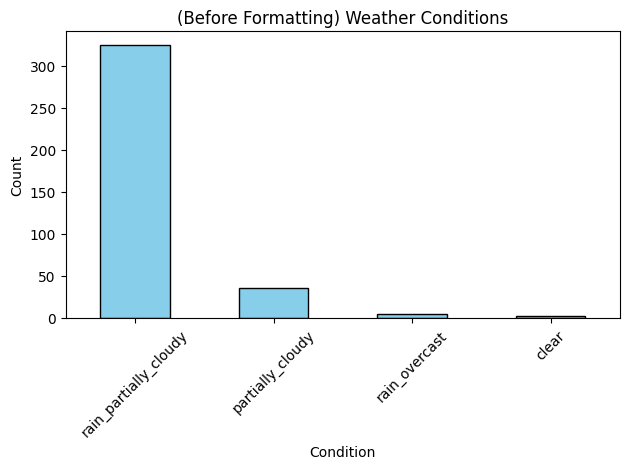

In [49]:

# Plot bar chart
counts = kericho_2020["conditions"].value_counts()
counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("(Before Formatting) Weather Conditions")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

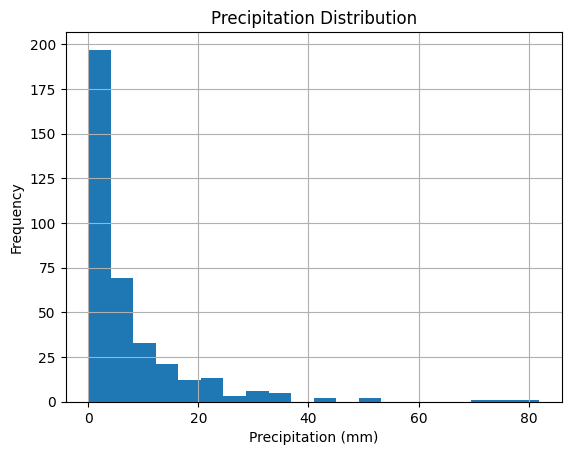

In [50]:
# Plot a histogram for rainfall distribution
kericho_2020["precip"].hist(bins=20)
plt.title("Precipitation Distribution")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.show()

In [51]:
def group_weather_conditions(row):
    if row["precip"] > 4.0:
        return "rain"
    elif row["cloudcover"] > 80:
        return "overcast"
    elif row["cloudcover"] < 15 and row["solarradiation"] > 500:
        return "sunny"
    elif row["cloudcover"] > 40 or row["humidity"] > 70:
        return "partially_cloudy"
    else:
        return "clear"
    
kericho_2020["conditions"] = kericho_2020.apply(group_weather_conditions, axis=1)
kericho_2020["conditions"].value_counts()

conditions
partially_cloudy    173
rain                169
clear                16
overcast              8
Name: count, dtype: int64

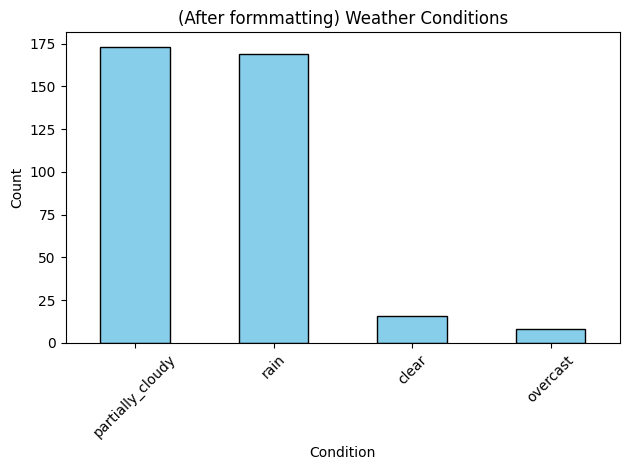

In [52]:
# Count new unique values
counts = kericho_2020["conditions"].value_counts()

# Plot bar chart
counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("(After formmatting) Weather Conditions")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plot Weather Data For Kericho For The Years 2020-2024
This will enable us to view the shape of the data and confirm if it aligns to already established climate patterns.
Data that aligns to already established climate patterns is more trustworthy than one that is not.

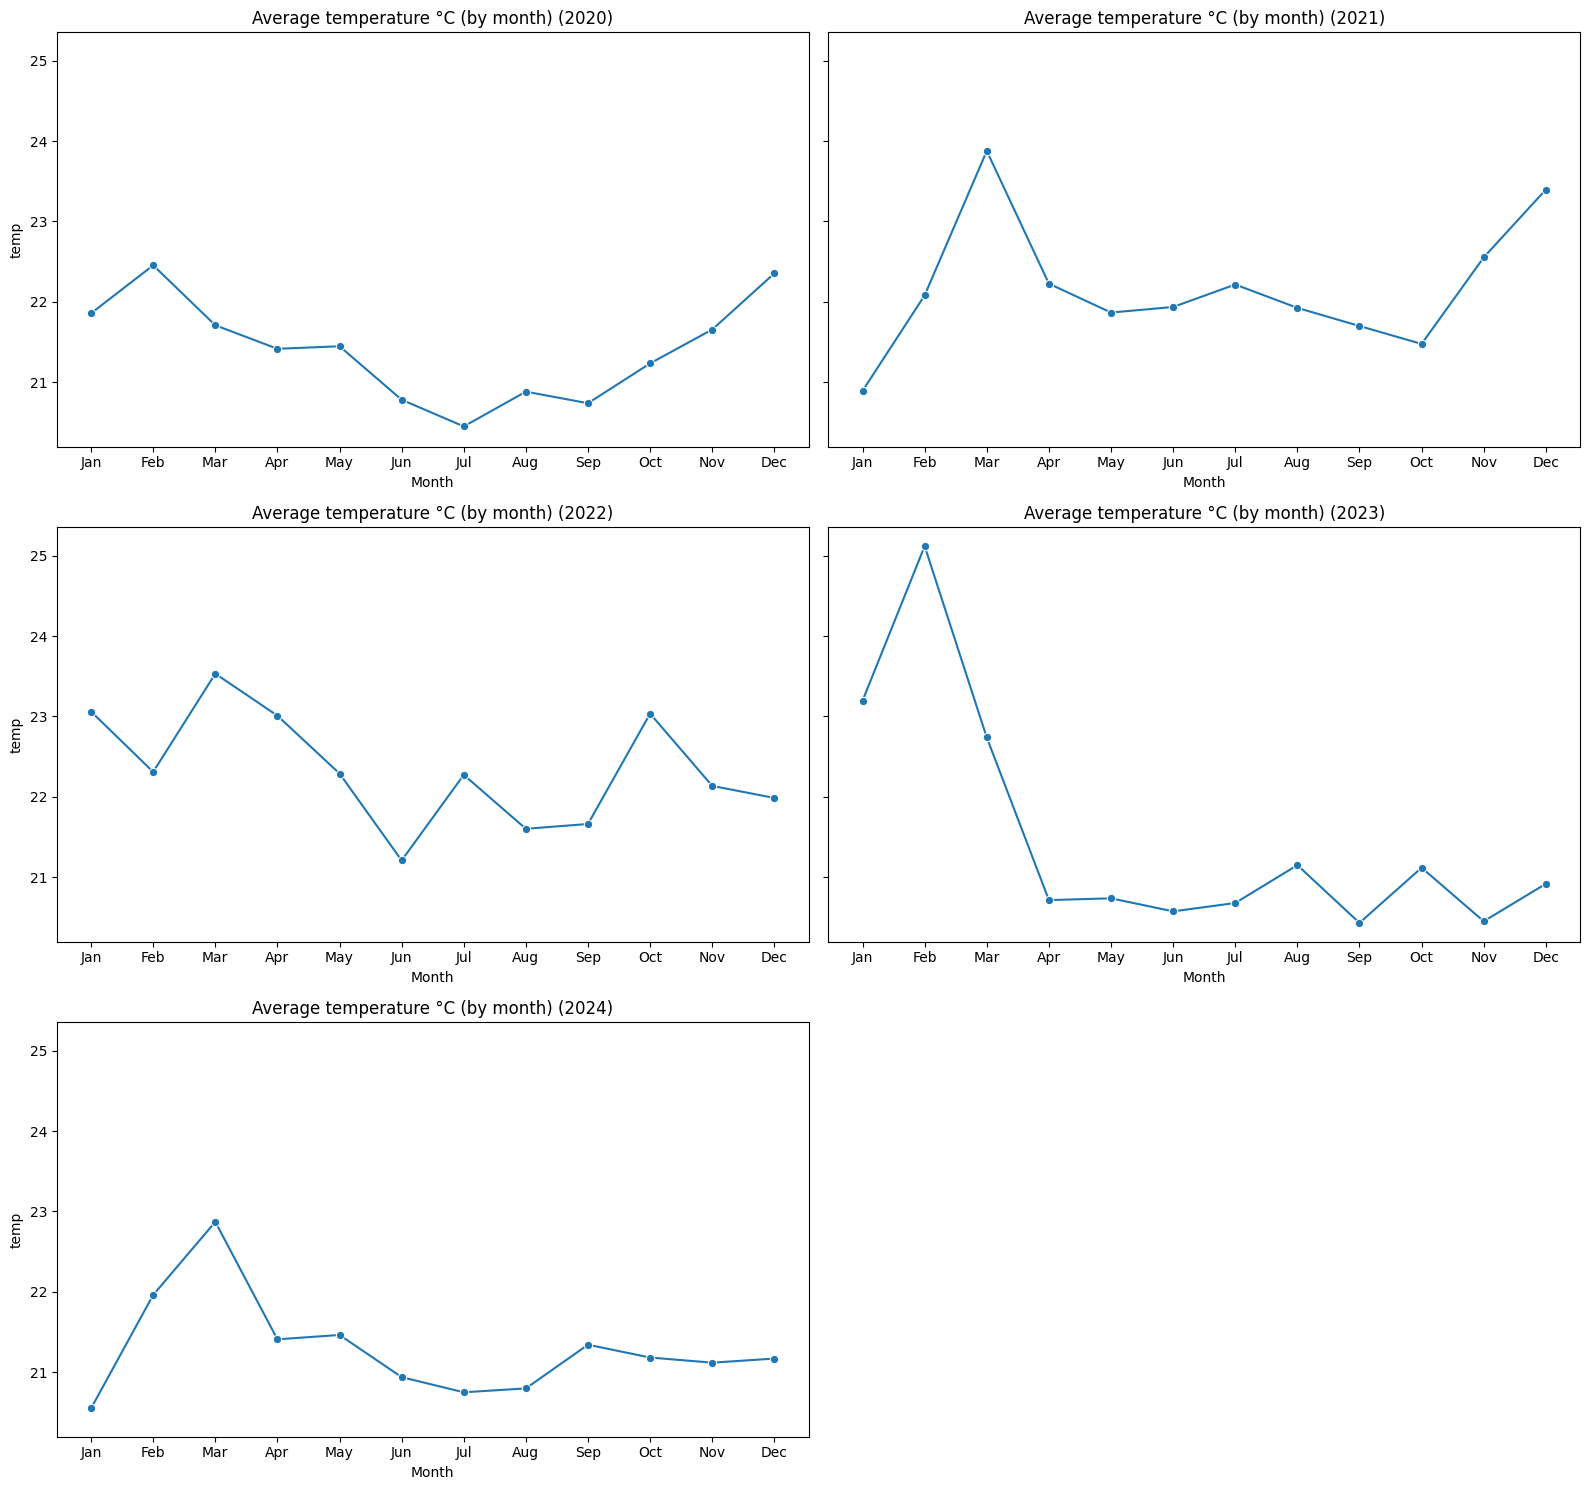

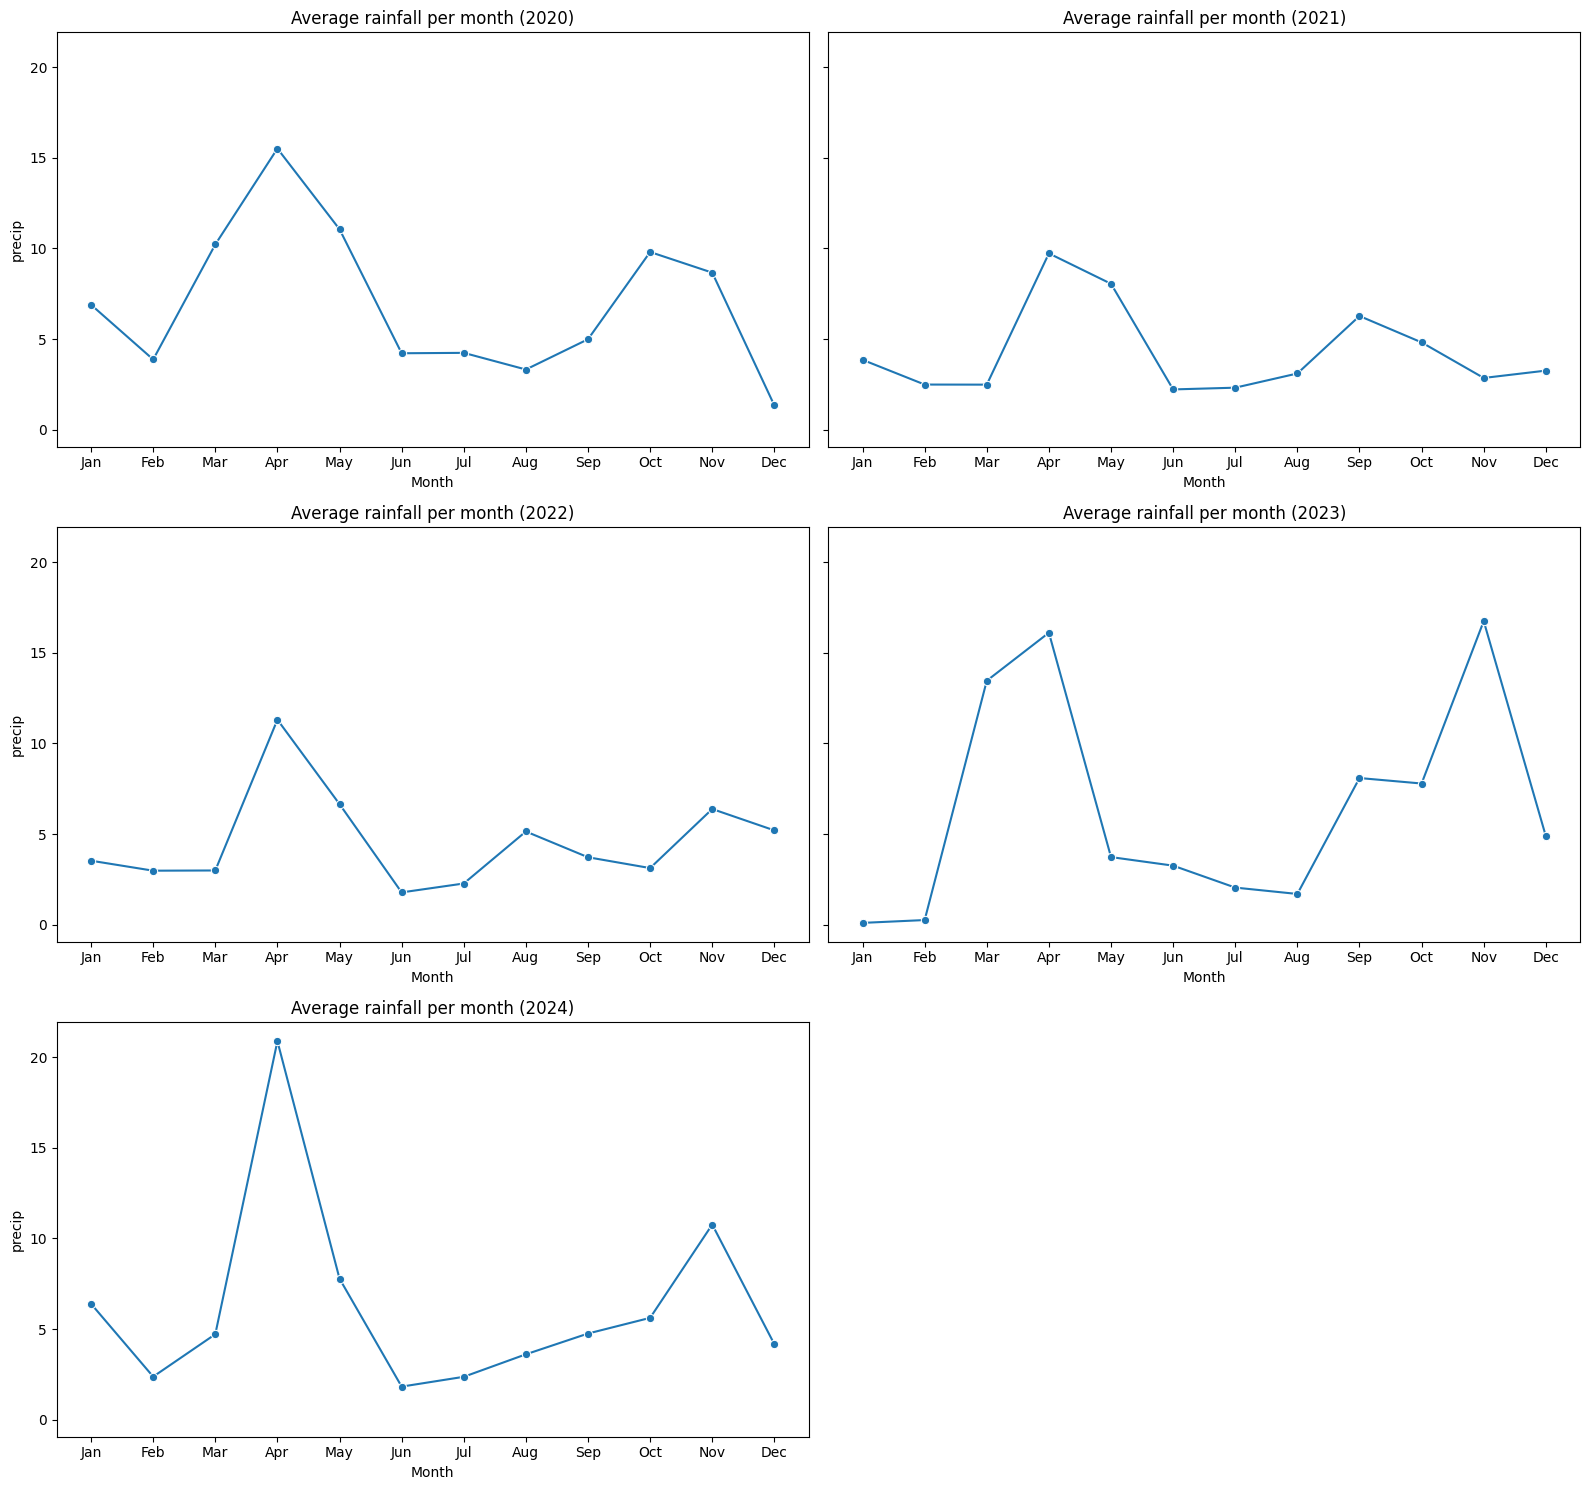

In [57]:
# Plot our weather data onto a graph to see how it looks like
def plt_weather_data(weather, columnname, title):
    weather = weather.copy()
    weather['year'] = weather.index.year
    weather['month'] = weather.index.month

    years = sorted(weather['year'].unique())
    n_years = len(years)

    # Create subplot grid (1 row per 2 columns)
    cols = 2
    rows = (n_years + 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows), sharey=True)
    axes = axes.flatten()

    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    for i, year in enumerate(years):
        df_year = weather[weather['year'] == year]
        monthly_avg = df_year.groupby('month')[columnname].mean()

        # Plot
        ax = axes[i]
        sns.lineplot(
            x=month_names,
            y=monthly_avg.values,
            marker="o",
            ax=ax
        )
        ax.set_title(f"{title} ({year})")
        ax.set_xlabel("Month")
        ax.set_ylabel(columnname)

    # Hide unused subplots if number of years is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plt_weather_data(kericho_weather, "temp", "Average temperature °C (by month)")
plt_weather_data(kericho_weather, "precip", "Average rainfall per month")

### Forecasting
In this section, I am going to implement a weather forecasting model called __Climatological Forecasting__. 

Let's say today is July 15, 2025, and you want to predict the weather for the next 7 days. You would:

    1. For each target day, look back at past similar days
    2. Average the values (temp, rain, humidity)
    3. Use that average as your forecast

Climatological forecasting is especially effective for predicting long-term seasonal patterns.


In [54]:
from datetime import datetime, timedelta

# Extract month and day for grouping
weather["month_day"] = weather.index.strftime("%m-%d")
weather["year"] = weather.index.year

# Define forecast target dates
today = datetime.today().date()
upcoming_days = []
for i in range(0, 8):
    tomorrow = today + timedelta(days=i)
    upcoming_days.append(tomorrow.strftime("%m-%d"))

forecast_columns = ["tempmax", "tempmin", "temp", "humidity", "precip", "windspeed", "conditions"]
forecast = []

# Calculate avg weather conditions over the years
for month_day in upcoming_days:
    data = weather[weather["month_day"] == month_day]
    
    if not data.empty:
        avg = {
            "date": f"2025-{month_day}",
        }
        for col in forecast_columns:
            if col == "conditions":
                # Most frequent condition
                mode_values = data[col].mode()
                if not mode_values.empty:
                    avg[col] = mode_values.iloc[0]
                else:
                    avg[col] = "Unknown"
            else:
                avg[col] = round(data[col].mean(), 2) 
        forecast.append(avg)

forecast_df = pd.DataFrame(forecast)

# Ensure 'date' column is datetime (in case it's a string)
forecast_df['date'] = pd.to_datetime(forecast_df['date'])

# Add day name column
forecast_df['day'] = forecast_df['date'].dt.day_name()
forecast_df


,date,tempmax,tempmin,temp,humidity,precip,windspeed,conditions,day
0,2025-08-07,27.26,13.90,20.66,69.90,1.44,17.60,rain_partially_cloudy,Thursday
1,2025-08-08,27.21,13.87,20.40,71.71,5.14,20.50,rain_partially_cloudy,Friday
2,2025-08-09,26.11,14.14,20.07,72.00,3.06,18.27,rain_partially_cloudy,Saturday
3,2025-08-10,27.33,12.99,19.94,74.19,2.03,21.31,rain_partially_cloudy,Sunday
4,2025-08-11,27.23,14.01,20.66,71.89,2.94,21.60,rain_partially_cloudy,Monday
5,2025-08-12,26.73,14.69,20.46,73.33,9.93,22.09,rain_partially_cloudy,Tuesday
6,2025-08-13,27.34,13.54,19.87,75.04,5.99,20.30,rain_partially_cloudy,Wednesday
7,2025-08-14,26.57,13.74,20.07,75.33,3.90,23.41,rain_partially_cloudy,Thursday


In [55]:
# Ensure 'date' column is datetime (in case it's a string)
forecast_df['date'] = pd.to_datetime(forecast_df['date'])

# Add day name column
forecast_df['day'] = forecast_df['date'].dt.day_name()

forecast_json = forecast_df.to_json(orient="records", date_format="iso")
print(forecast_json)

[{"date":"2025-08-07T00:00:00.000","tempmax":27.26,"tempmin":13.9,"temp":20.66,"humidity":69.9,"precip":1.44,"windspeed":17.6,"conditions":"rain_partially_cloudy","day":"Thursday"},{"date":"2025-08-08T00:00:00.000","tempmax":27.21,"tempmin":13.87,"temp":20.4,"humidity":71.71,"precip":5.14,"windspeed":20.5,"conditions":"rain_partially_cloudy","day":"Friday"},{"date":"2025-08-09T00:00:00.000","tempmax":26.11,"tempmin":14.14,"temp":20.07,"humidity":72.0,"precip":3.06,"windspeed":18.27,"conditions":"rain_partially_cloudy","day":"Saturday"},{"date":"2025-08-10T00:00:00.000","tempmax":27.33,"tempmin":12.99,"temp":19.94,"humidity":74.19,"precip":2.03,"windspeed":21.31,"conditions":"rain_partially_cloudy","day":"Sunday"},{"date":"2025-08-11T00:00:00.000","tempmax":27.23,"tempmin":14.01,"temp":20.66,"humidity":71.89,"precip":2.94,"windspeed":21.6,"conditions":"rain_partially_cloudy","day":"Monday"},{"date":"2025-08-12T00:00:00.000","tempmax":26.73,"tempmin":14.69,"temp":20.46,"humidity":73.33,"